In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_5802/1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
train_df = pd.read_csv("/Users/hj/Downloads/titanic/train.csv")
test_df = pd.read_csv("/Users/hj/Downloads/titanic/test.csv")

1. 데이터 로드 & 분리
    - train / test 데이터 분리
2. 탐색적 데이터 분석(EDA)
    - 분포확인 & 이상치 확인
3. 데이터 전처리
    - 결측치 처리
        - 수치형: Age
        - 범주형: Embarked
        - 삭제 : Cabin, Name
    - 전처리
        - 수치형: Age, Fare, Sibsp+Parch
        - 범주형
            - 레이블 인코딩: Pclass, Sex
            - 원- 핫 인코딩: Embarked
4. 모델 수립
5. 평가

In [3]:
test_df.head()

# survived 데이터 없음
# 전처리는 함수로 처리하는게 좋음 (train, test 둘다 해야하기 때문에)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
# 기초가공: family 변수생성
train_df_2 = train_df.copy()
def get_family(df):
    df['Family']=df['SibSp'] + df['Parch'] + 1
    return df

get_family(train_df_2).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


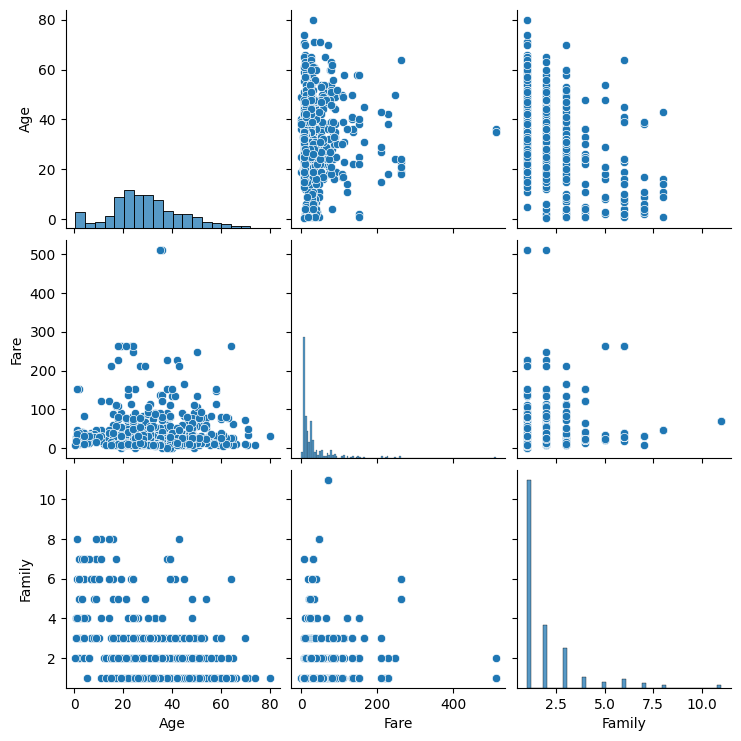

In [7]:
# 숫자형 변수들의 이상치를 확인하기 위하여 pairplot
sns.pairplot(train_df_2[['Age', 'Fare', 'Family']])

In [8]:
# 
train_df_2 = train_df_2[train_df_2['Fare'] < 512]

In [9]:
train_df_2.shape

# 이상치 3개 삭제됨 891->888

(888, 13)

In [10]:
train_df_2[['Fare']].describe()

,Fare
count,888.000000
mean,30.582164
std,41.176366
min,0.000000
25%,7.895800
50%,14.454200
75%,30.771850
max,263.000000


In [11]:
# 결측치 처리
def get_non_missing(df):
    Age_mean = train_df_2['Age'].mean()
    Fare_mean = train_df_2['Fare'].mean()
    df['Age'] = df['Age'].fillna(Age_mean)
    # train 데이터에는 필요하지 않으나 test 데이터에 결측치가 존재하기 때문에 추가
    df['Fare'] = df['Fare'].fillna(Fare_mean)
    df['Embarked'] = df['Embarked'].fillna('S')
    return df
get_non_missing(train_df_2).info()

<class 'pandas.core.frame.DataFrame'>
Index: 888 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    int64  
 3   Name         888 non-null    object 
 4   Sex          888 non-null    object 
 5   Age          888 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        888 non-null    int64  
 8   Ticket       888 non-null    object 
 9   Fare         888 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     888 non-null    object 
 12  Family       888 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 97.1+ KB


In [12]:
# 전처리
# family, age => minmax
# Fare => standard

def get_numeric_sc(df):
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    sd_sc = StandardScaler()
    mm_sc = MinMaxScaler()
    
    sd_sc.fit(train_df_2[['Fare']])
    df['Fare_sd_sc'] = sd_sc.transform(df[['Fare']])
    
    mm_sc.fit(train_df_2[['Age', 'Family']])
    df[['Age_mm_sc', 'Family_mm_sc']] = mm_sc.transform(df[['Age', 'Family']])
    
    return df

get_numeric_sc(train_df_2).describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Fare_sd_sc,Age_mm_sc,Family_mm_sc
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,8.880000e+02,888.000000,888.000000
mean,445.618243,0.381757,2.313063,29.675345,0.524775,0.381757,30.582164,1.906532,6.801366e-17,0.367622,0.090653
std,257.405474,0.486091,0.834007,13.019816,1.104186,0.806949,41.176366,1.615609,1.000564e+00,0.163607,0.161561
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,-7.431301e-01,0.000000,0.000000
25%,222.750000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,1.000000,-5.512664e-01,0.271174,0.000000
50%,445.500000,0.000000,3.000000,29.675345,0.000000,0.000000,14.454200,1.000000,-3.919008e-01,0.367622,0.000000
75%,667.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.771850,2.000000,4.609266e-03,0.434531,0.100000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000,11.000000,5.647628e+00,1.000000,1.000000


In [13]:
# 범주형데이터 레이블 인코딩: Pclass, Sex
# 범주형데이터 원핫인코딩 : Embarked

def get_category(df):
    from sklearn.preprocessing import LabelEncoder, OneHotEncoder
    le = LabelEncoder()
    le2 = LabelEncoder()
    oe = OneHotEncoder()
    
    le.fit(train_df_2[['Pclass']])
    df['Pclass_le'] = le.transform(df['Pclass'])
    
    le2.fit(train_df_2[['Sex']])
    df['Sex_le'] = le2.transform(df['Sex'])
    
    # index reset을 하기위한 구문
    df = df.reset_index()
    oe.fit(train_df_2[['Embarked']])
    #원핫인코딩은 바로 바꾼후 해당 값에 넣을 수 없음. 데이터프레임을 만든후 연결해야함
    embarked_csr = oe.transform(df[['Embarked']])
    embarked_csr_df = pd.DataFrame(embarked_csr.toarray(), columns = oe.get_feature_names_out())
    df = pd.concat([df, embarked_csr_df], axis = 1)
    return df

train_df_2 = get_category(train_df_2)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
train_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         888 non-null    int64  
 1   PassengerId   888 non-null    int64  
 2   Survived      888 non-null    int64  
 3   Pclass        888 non-null    int64  
 4   Name          888 non-null    object 
 5   Sex           888 non-null    object 
 6   Age           888 non-null    float64
 7   SibSp         888 non-null    int64  
 8   Parch         888 non-null    int64  
 9   Ticket        888 non-null    object 
 10  Fare          888 non-null    float64
 11  Cabin         202 non-null    object 
 12  Embarked      888 non-null    object 
 13  Family        888 non-null    int64  
 14  Fare_sd_sc    888 non-null    float64
 15  Age_mm_sc     888 non-null    float64
 16  Family_mm_sc  888 non-null    float64
 17  Pclass_le     888 non-null    int64  
 18  Sex_le        888 non-null    

In [15]:
def get_model(df):
    from sklearn.linear_model import LogisticRegression
    model_lor = LogisticRegression()
    X = df[['Age_mm_sc', 'Fare_sd_sc', 'Family_mm_sc', 'Pclass_le', 'Sex_le','Embarked_C','Embarked_Q','Embarked_S']]
    y = df['Survived']
    return model_lor.fit(X,y)


In [16]:
model_output = get_model(train_df_2)
model_output

LogisticRegression()

In [17]:
X = train_df_2[['Age_mm_sc', 'Fare_sd_sc', 'Family_mm_sc', 'Pclass_le', 'Sex_le','Embarked_C','Embarked_Q','Embarked_S']]
y_pred = model_output.predict(X)

# 평가
from sklearn.metrics import accuracy_score, f1_score
print(accuracy_score(train_df_2['Survived'], y_pred))
print(f1_score(train_df_2['Survived'], y_pred))


0.8029279279279279
0.7320061255742726


# test 데이터에 적용하기

In [18]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [20]:
test_df_2 = get_family(test_df)
test_df_2 = get_non_missing(test_df_2)
test_df_2 = get_numeric_sc(test_df_2)
test_df_2 = get_category(test_df_2)
type(model_output)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


sklearn.linear_model._logistic.LogisticRegression

In [21]:
model_output.classes_
model_output.coef_
model_output.intercept_

array([3.5130964])

In [22]:
train_df_2.columns

Index(['index', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family',
       'Fare_sd_sc', 'Age_mm_sc', 'Family_mm_sc', 'Pclass_le', 'Sex_le',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [23]:
test_df_2.columns

Index(['index', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family', 'Fare_sd_sc',
       'Age_mm_sc', 'Family_mm_sc', 'Pclass_le', 'Sex_le', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [24]:
test_X = test_df_2[['Age_mm_sc', 'Fare_sd_sc', 'Family_mm_sc', 'Pclass_le', 'Sex_le','Embarked_C','Embarked_Q','Embarked_S']]
# test_X.info()
y_test_pred = model_output.predict(test_X) 

In [25]:
sub_df = pd.read_csv("/Users/hj/Downloads/titanic/gender_submission.csv")
sub_df.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [26]:
sub_df['Survived'] = y_test_pred
sub_df.head(10)
sub_df.to_csv('./result.csv', index=False)  # <= kaggle에 제출

sklearn 에 knn과 gbn까지는 있으나 xgboost와 LGBM은 따로 다운을 받아야 함

In [34]:
# !pip install xgboost
!pip install lightgbm

  Using cached lightgbm-4.3.0.tar.gz (1.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for lightgbm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [37 lines of output]
      2024-02-07 21:10:24,701 - scikit_build_core - INFO - CMake version: 3.28.1
      *** scikit-build-core 0.8.0 using CMake 3.28.1 (wheel)
      2024-02-07 21:10:24,704 - scikit_build_core - INFO - Build directory: /private/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/tmp62w3kc9a/build
      *** Configuring CMake...
      2024-02-07 21:10:24,911 - scikit_build_core - INFO - Ninja version: 1.11.1
      2024-02-07 21:10:24,911 - scikit_build_core - WARNING - libdir/ldlibrary: /Library/Frameworks/Python.framework/Versions/3.11/lib/Python.framework/Versions/3.11/Python is not a real file!
      loading init